In [285]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [185]:
df1 = pd.read_csv(r"C:\Users\HP\Desktop\PracticeData\Housing_dataset_train.csv")

In [186]:
df = df1.copy()

In [187]:
df.head()

,ID,loc,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [188]:
df.rename(columns={'loc': 'locn'}, inplace=True)

In [189]:
df.head(2)

,ID,locn,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689


In [190]:
df.isnull().sum()

ID                  0
locn             1813
title            1722
bedroom          1799
bathroom         1805
parking_space    1811
price               0
dtype: int64

In [191]:
df.shape

(14000, 7)

In [192]:
df2 = df.dropna(subset=['bedroom', 'bathroom', 'parking_space'], how='all')


In [193]:
df2.isnull().sum()

ID                  0
locn             1813
title            1722
bedroom          1793
bathroom         1799
parking_space    1805
price               0
dtype: int64

In [194]:
df2.shape

(13994, 7)

In [195]:
df2.head()

,ID,locn,title,bedroom,bathroom,parking_space,price
0,3583,Katsina,Semi-detached duplex,2.0,2.0,1.0,1149999.565
1,2748,Ondo,Apartment,NaN,2.0,4.0,1672416.689
2,9261,Ekiti,NaN,7.0,5.0,NaN,3364799.814
3,2224,Anambra,Detached duplex,5.0,2.0,4.0,2410306.756
4,10300,Kogi,Terrace duplex,NaN,5.0,6.0,2600700.898


In [196]:
summary = df2.groupby('title').agg({
    'bedroom': 'count',
    'bathroom': 'count',
    'parking_space': 'count'
}).reset_index()

In [197]:
summary

,title,bedroom,bathroom,parking_space
0,Apartment,1133,1156,1134
1,Bungalow,1122,1087,1111
2,Cottage,381,386,398
3,Detached duplex,1153,1128,1126
4,Flat,1193,1179,1181
5,Mansion,1120,1132,1138
6,Penthouse,1140,1125,1128
7,Semi-detached duplex,1087,1109,1099
8,Terrace duplex,1095,1097,1070
9,Townhouse,1128,1140,1157


<Axes: xlabel='bedroom', ylabel='title'>

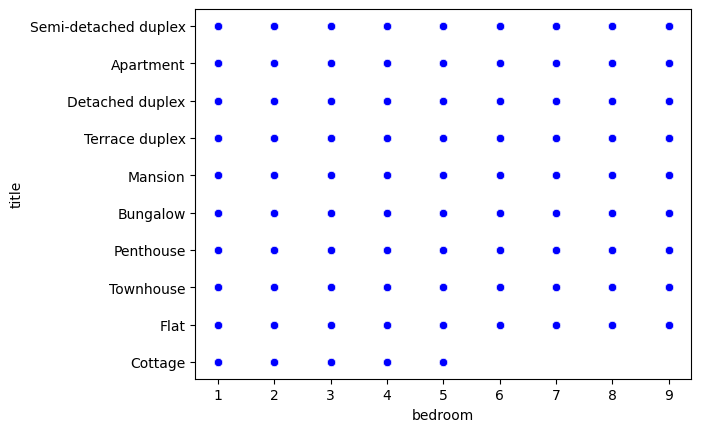

In [198]:
sns.scatterplot(data=df2, y='title', x='bedroom', color='blue')

<Axes: xlabel='bathroom', ylabel='title'>

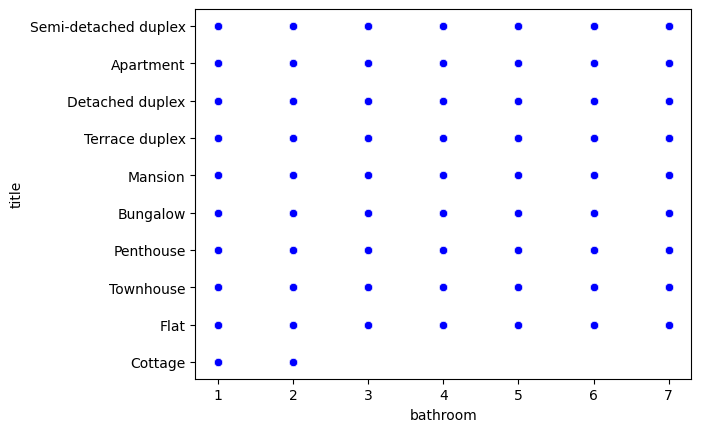

In [199]:
sns.scatterplot(data=df2, y='title', x='bathroom', color='blue')

<Axes: xlabel='parking_space', ylabel='title'>

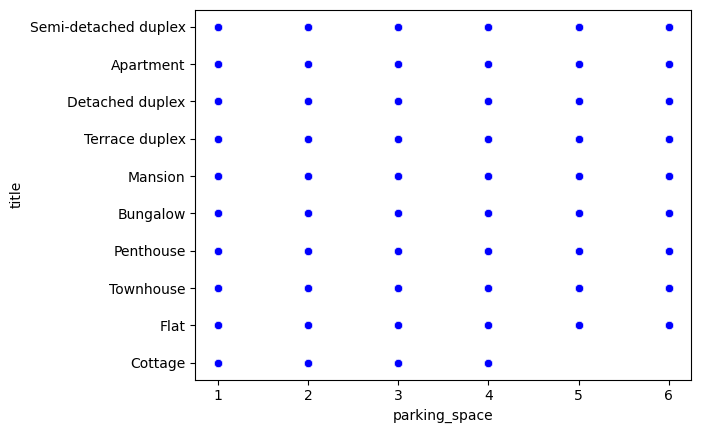

In [200]:
sns.scatterplot(data=df2, y='title', x='parking_space', color='blue')

In [201]:
df2.title.describe()

count     12272
unique       10
top        Flat
freq       1371
Name: title, dtype: object

In [202]:
condition = ((df2['bedroom'] <= 5) & (df2['parking_space'] <= 4) & (df2['bathroom'] <= 2))

df2.loc[condition & df2['title'].isnull(), 'title'] = 'Cottage'

In [203]:
df2.isnull().sum()

ID                  0
locn             1813
title            1090
bedroom          1793
bathroom         1799
parking_space    1805
price               0
dtype: int64

In [220]:
locn_fill = df2.locn.fillna('Nigeria', inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5844\1004919099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  locn_fill = df2.locn.fillna('Nigeria', inplace = True)


In [205]:
df2.parking_space.mode()

0    4.0
Name: parking_space, dtype: float64

In [206]:
bedroom_distribution = df2.groupby('title')['bedroom'].value_counts().unstack(fill_value=0)
most_common_bedrooms = df2.groupby('title')['bedroom'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
#df2['bedroom'] = df.apply(lambda row: most_common_bedrooms[row['title']] if pd.isna(row['bedroom']) else row['bedroom'], axis=1)

In [207]:
most_common_bedrooms

title
Apartment               1.0
Bungalow                2.0
Cottage                 2.0
Detached duplex         5.0
Flat                    1.0
Mansion                 3.0
Penthouse               2.0
Semi-detached duplex    5.0
Terrace duplex          1.0
Townhouse               1.0
Name: bedroom, dtype: float64

In [208]:
df2.loc[(df2['title'] == 'Apartment') & (df2['bedroom'].isna()), 'bedroom'] = 1
df2.loc[(df2['title'] == 'Bungalow') & (df2['bedroom'].isna()), 'bedroom'] = 2
df2.loc[(df2['title'] == 'Cottage') & (df2['bedroom'].isna()), 'bedroom'] = 2
df2.loc[(df2['title'] == 'Detached duplex') & (df2['bedroom'].isna()), 'bedroom'] = 5
df2.loc[(df2['title'] == 'Flat') & (df2['bedroom'].isna()), 'bedroom'] = 1
df2.loc[(df2['title'] == 'Mansion') & (df2['bedroom'].isna()), 'bedroom'] = 3
df2.loc[(df2['title'] == 'Penthouse') & (df2['bedroom'].isna()), 'bedroom'] = 2
df2.loc[(df2['title'] == 'Semi-detached duplex') & (df2['bedroom'].isna()), 'bedroom'] = 5
df2.loc[(df2['title'] == 'Terrace duplex') & (df2['bedroom'].isna()), 'bedroom'] = 1
df2.loc[(df2['title'] == 'Townhouse') & (df2['bedroom'].isna()), 'bedroom'] = 1

In [209]:
df2.bedroom.isnull().sum()

73

In [210]:
bathroom_distribution = df2.groupby('title')['bathroom'].value_counts().unstack(fill_value=0)
most_common_bathrooms = df2.groupby('title')['bathroom'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
#df2['bedroom'] = df.apply(lambda row: most_common_bedrooms[row['title']

In [211]:
most_common_bathrooms

title
Apartment               1.0
Bungalow                1.0
Cottage                 2.0
Detached duplex         2.0
Flat                    2.0
Mansion                 1.0
Penthouse               2.0
Semi-detached duplex    2.0
Terrace duplex          1.0
Townhouse               1.0
Name: bathroom, dtype: float64

In [212]:
df2.loc[(df2['title'] == 'Apartment') & (df2['bathroom'].isna()), 'bathroom'] = 1
df2.loc[(df2['title'] == 'Bungalow') & (df2['bathroom'].isna()), 'bathroom'] = 1
df2.loc[(df2['title'] == 'Cottage') & (df2['bathroom'].isna()), 'bathroom'] = 2
df2.loc[(df2['title'] == 'Detached duplex') & (df2['bathroom'].isna()), 'bathroom'] = 2
df2.loc[(df2['title'] == 'Flat') & (df2['bathroom'].isna()), 'bathroom'] = 2
df2.loc[(df2['title'] == 'Mansion') & (df2['bathroom'].isna()), 'bathroom'] = 1
df2.loc[(df2['title'] == 'Penthouse') & (df2['bathroom'].isna()), 'bathroom'] = 2
df2.loc[(df2['title'] == 'Semi-detached duplex') & (df2['bathroom'].isna()), 'bathroom'] = 2
df2.loc[(df2['title'] == 'Terrace duplex') & (df2['bathroom'].isna()), 'bathroom'] = 1
df2.loc[(df2['title'] == 'Townhouse') & (df2['bathroom'].isna()), 'bathroom'] = 1

In [213]:
df2.bathroom.isnull().sum()

66

In [214]:
parking_space_distribution = df2.groupby('title')['parking_space'].value_counts().unstack(fill_value=0)
most_common_parking_space = df2.groupby('title')['parking_space'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
#df2['bedroom'] = df.apply(lambda row: most_common_bedrooms[row['title']

In [215]:
most_common_parking_space

title
Apartment               4.0
Bungalow                2.0
Cottage                 4.0
Detached duplex         2.0
Flat                    3.0
Mansion                 2.0
Penthouse               4.0
Semi-detached duplex    3.0
Terrace duplex          2.0
Townhouse               3.0
Name: parking_space, dtype: float64

In [216]:
df2.loc[(df2['title'] == 'Apartment') & (df2['parking_space'].isna()), 'parking_space'] = 4
df2.loc[(df2['title'] == 'Bungalow') & (df2['parking_space'].isna()), 'parking_space'] = 2
df2.loc[(df2['title'] == 'Cottage') & (df2['parking_space'].isna()), 'parking_space'] = 4
df2.loc[(df2['title'] == 'Detached duplex') & (df2['parking_space'].isna()), 'parking_space'] = 2
df2.loc[(df2['title'] == 'Flat') & (df2['parking_space'].isna()), 'parking_space'] = 3
df2.loc[(df2['title'] == 'Mansion') & (df2['parking_space'].isna()), 'parking_space'] = 2
df2.loc[(df2['title'] == 'Penthouse') & (df2['parking_space'].isna()), 'parking_space'] = 4
df2.loc[(df2['title'] == 'Semi-detached duplex') & (df2['parking_space'].isna()), 'parking_space'] = 3
df2.loc[(df2['title'] == 'Terrace duplex') & (df2['parking_space'].isna()), 'parking_space'] = 2
df2.loc[(df2['title'] == 'Townhouse') & (df2['parking_space'].isna()), 'parking_space'] = 3

In [217]:
df2.isnull().sum()

ID                  0
locn             1813
title            1090
bedroom            73
bathroom           66
parking_space      75
price               0
dtype: int64

In [218]:
df2.loc[(df['title'].isna()) & (df['bedroom'] == 1) & (df['bathroom'] == 1) & (df['parking_space'] == 4), 'title'] = 'Apartment'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 2) & (df['bathroom'] == 1) & (df['parking_space'] == 2), 'title'] = 'Bungalow'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 2) & (df['bathroom'] == 2) & (df['parking_space'] == 4), 'title'] = 'Cottage'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 5) & (df['bathroom'] == 2) & (df['parking_space'] == 2), 'title'] = 'Detached duplex'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 1) & (df['bathroom'] == 2) & (df['parking_space'] == 3), 'title'] = 'Flat'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 3) & (df['bathroom'] == 1) & (df['parking_space'] == 2), 'title'] = 'Mansion'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 2) & (df['bathroom'] == 2) & (df['parking_space'] == 4), 'title'] = 'Penthouse'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 5) & (df['bathroom'] == 2) & (df['parking_space'] == 3), 'title'] = 'Semi-detached duplex'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 1) & (df['bathroom'] == 1) & (df['parking_space'] == 2), 'title'] = 'Terrace duplex'
df2.loc[(df['title'].isna()) & (df['bedroom'] == 1) & (df['bathroom'] == 1) & (df['parking_space'] == 3), 'title'] = 'Townhouse'

In [219]:
df2.isnull().sum()

ID                  0
locn             1813
title            1090
bedroom            73
bathroom           66
parking_space      75
price               0
dtype: int64

In [222]:
Title_fill = df2.title.fillna('unamed_houses', inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5844\350965458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Title_fill = df2.title.fillna('unamed_houses', inplace = True)


In [223]:
df2.isnull().sum()

ID                0
locn              0
title             0
bedroom          73
bathroom         66
parking_space    75
price             0
dtype: int64

In [245]:
df2.describe()

,ID,bedroom,bathroom,parking_space,price
count,13994.000000,13921.000000,13928.000000,13919.000000,1.399400e+04
mean,4862.006789,4.063789,2.926766,3.125656,2.138243e+06
std,3818.313776,2.437279,1.990775,1.527664,1.083180e+06
min,0.000000,1.000000,1.000000,1.000000,4.319673e+05
25%,1672.000000,2.000000,1.000000,2.000000,1.394078e+06
50%,3525.000000,4.000000,2.000000,3.000000,1.895448e+06
75%,8009.500000,6.000000,4.000000,4.000000,2.587156e+06
max,12999.000000,9.000000,7.000000,6.000000,1.656849e+07


In [225]:
df2.to_csv('cleaned_housing_data.csv', index=False)

In [229]:
cldf1 = pd.read_csv(r"C:\Users\HP\Desktop\Webfala\cleaned_housing_data.csv")

In [230]:
cldf = cldf1.copy()

In [246]:
bed_fill_value = cldf.bedroom.mean()

In [252]:
bath_fill_value = cldf.bathroom.mean()

In [256]:
park_fill_value = cldf.parking_space.mean()

In [250]:
bedroom_fill = cldf.bedroom.fillna(bed_fill_value, inplace = True)

In [258]:
cldf.isnull().sum()

ID               0
locn             0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [255]:
bathroom_fill = cldf.bathroom.fillna(bath_fill_value, inplace = True)

In [257]:
parking_space_fill = cldf.parking_space.fillna(park_fill_value, inplace = True)

In [259]:
cldf.to_csv('further_cleaned_housing_data.csv', index=False)

In [261]:
ds = pd.read_csv(r"C:\Users\HP\Desktop\Webfala\further_cleaned_housing_data.csv")

In [262]:
ds.isnull().sum()

ID               0
locn             0
title            0
bedroom          0
bathroom         0
parking_space    0
price            0
dtype: int64

In [263]:
ds.drop('ID', axis=1, inplace=True)

In [265]:
ds.locn.nunique()

37

In [266]:
ds['locn'] = pd.factorize(ds['locn'])[0] + 1

In [274]:
ds.head()

,locn,title,bedroom,bathroom,parking_space,price
0,1,1,2.0,2.0,1.000000,1149999.565
1,2,2,1.0,2.0,4.000000,1672416.689
2,3,3,7.0,5.0,3.125656,3364799.814
3,4,4,5.0,2.0,4.000000,2410306.756
4,5,5,1.0,5.0,6.000000,2600700.898


In [270]:
ds.title.unique()

array(['Semi-detached duplex', 'Apartment', 'unamed_houses',
       'Detached duplex', 'Terrace duplex', 'Mansion', 'Bungalow',
       'Penthouse', 'Townhouse', 'Cottage', 'Flat'], dtype=object)

In [271]:
ds['title'] = pd.factorize(ds['title'])[0] + 1

In [273]:
ds.head()

,locn,title,bedroom,bathroom,parking_space,price
0,1,1,2.0,2.0,1.000000,1149999.565
1,2,2,1.0,2.0,4.000000,1672416.689
2,3,3,7.0,5.0,3.125656,3364799.814
3,4,4,5.0,2.0,4.000000,2410306.756
4,5,5,1.0,5.0,6.000000,2600700.898


In [276]:
ds.shape

(13994, 6)

In [278]:
X = ds[['locn','title','bedroom','bathroom','parking_space']]
y = ds['price']

In [279]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=.18, random_state=4)

In [280]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11475, 5)
(2519, 5)
(11475,)
(2519,)


In [281]:
model = DecisionTreeRegressor()

In [282]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [283]:
y_pred = model.predict(X_test)

In [284]:
mse = mean_squared_error(y_test,y_pred)
mse

851158280165.8241

In [286]:
model2 = LinearRegression()

In [287]:
model2.fit(X_train,y_train)

LinearRegression()

In [288]:
mse = mean_squared_error(y_test,y_pred)
mse

851158280165.8241